## Iris Flower Classification ML Project

In this project, the classification of iris flower is done according to the given features. The features are:

    1) Sepal Length (in cm)
    2) Petal Length (in cm)
    3) Petal Length (in cm)
    4) Petal Width (in cm)

The Iris Flower are of 3 types in this dataset.

    1) Iris Setosa
    2) Iris Versicolor
    3) Iris Virginica


Different ML Classification Algorithms are used in this project like:

    1) Logistic Regression
    2) Random Forest
    3) Decision Trees
    4) Support Vector Machines
    5) K - Nearest Neighbours


In [57]:
import warnings
warnings.filterwarnings('ignore')
# Ignoring the warnings that might come in the process

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing necessary libraries

### Data Importing and Information

In [59]:
columns = ["Sepal Length","Sepal Width","Petal Length","Petal Width", "Class Label"]
# Naming the columns

In [60]:
# Importing the .csv file with columns as the column names
iris = pd.read_csv('./iris.csv', names = columns)

In [61]:
# Printing first 5 rows of data
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
# Shape of dataset
iris.shape

(150, 5)

In [63]:
# More information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
# More insights from the data
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
# Count of 3 classes of the flower
counts = iris["Class Label"].value_counts()
counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class Label, dtype: int64

## Data Preprocessing

In [66]:
# Checking for missing values
iris.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class Label     0
dtype: int64

Since, the data has no missing values, for now no preprocessing is required.

## Exploratory Data Analysis

In [67]:
# Setting theme of seaborn
sns.set_style("darkgrid")

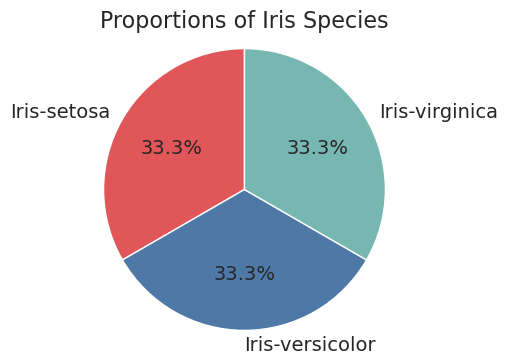

In [68]:
# Count the number of samples for each species
counts = iris["Class Label"].value_counts()

# Define the labels for the pie chart
labels = counts.index.tolist()

# Define the sizes for the pie chart
sizes = counts.tolist()

# Define the colors for the pie chart
colors = ["#E15759", "#4E79A7", "#76B7B2"]

# Create the pie chart using matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
ax.axis('equal')

# Set the plot title
ax.set_title("Proportions of Iris Species", fontsize=16)
sns.despine()

# Show the plot
plt.show()

There are equal number of examples of all 3 classes in the dataset (i.e. 50 each)

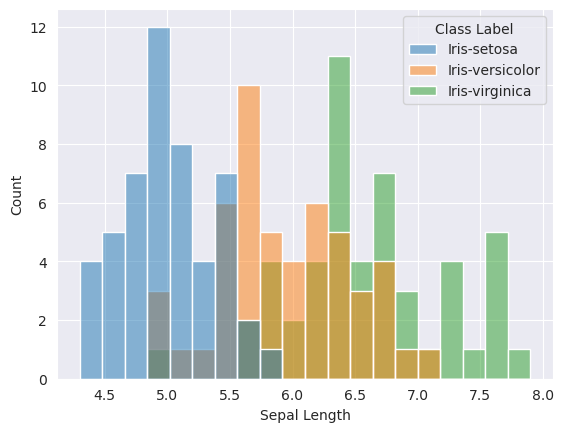

In [69]:
sns.histplot(data = iris , x= "Sepal Length", bins = 20, hue = "Class Label")
plt.show()

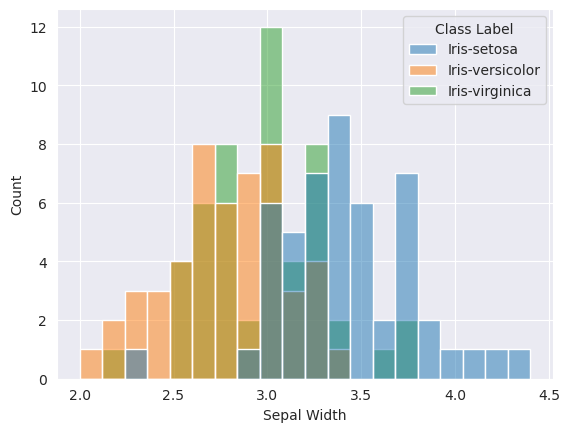

In [70]:
sns.histplot(data = iris , x= "Sepal Width", bins = 20,  hue = "Class Label")
plt.show()

These two barplots look like a normal distrubution which means the model can quickly learn from the data.

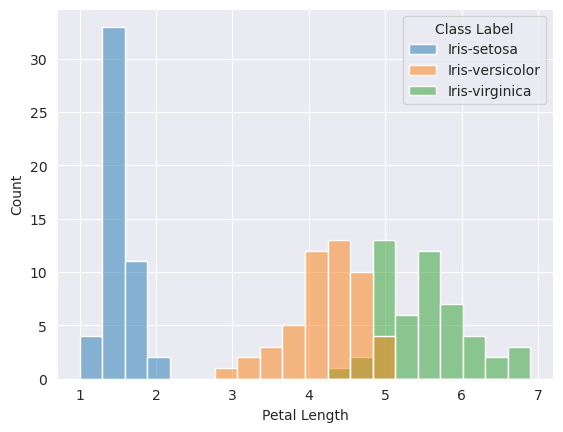

In [71]:
sns.histplot(data = iris , x= "Petal Length", bins = 20, hue = "Class Label")
plt.show()

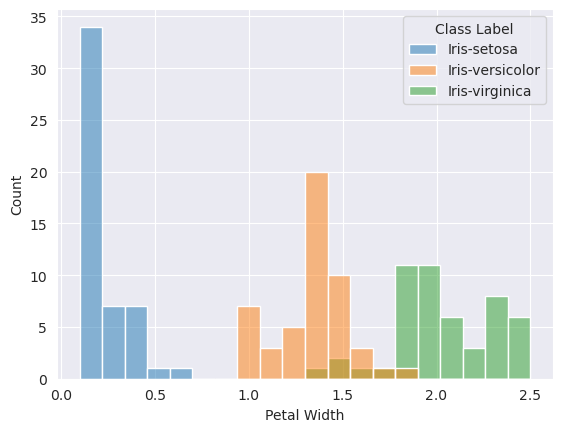

In [72]:
sns.histplot(data = iris , x= "Petal Width",bins = 20,  hue = "Class Label")
plt.show()

These two histplots shows that the setosa has a comparatively smaller petal length and width than the other two.

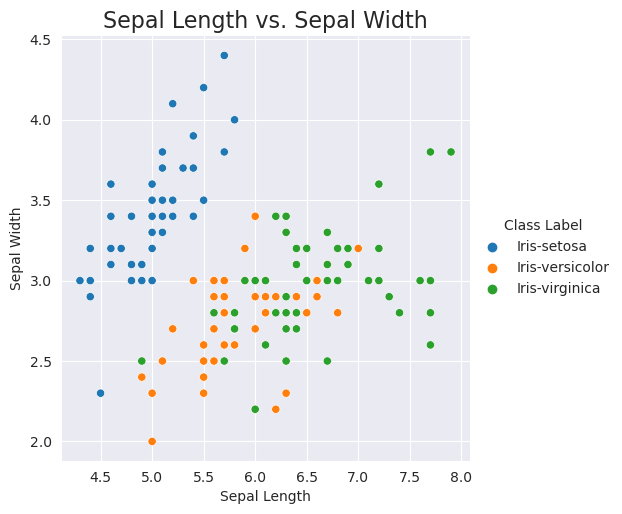

In [73]:
sns.relplot(data = iris, x="Sepal Length", y="Sepal Width", hue="Class Label", kind="scatter")
plt.title("Sepal Length vs. Sepal Width", fontsize=16)
plt.show()

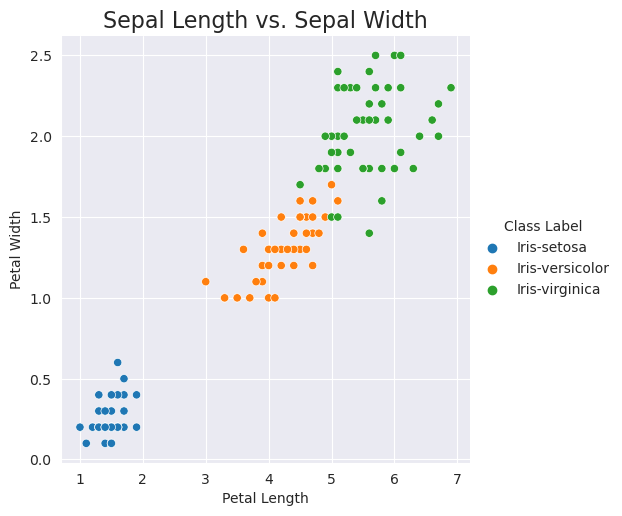

In [74]:
sns.relplot(data = iris, x="Petal Length", y="Petal Width", hue="Class Label", kind="scatter")
plt.title("Sepal Length vs. Sepal Width", fontsize=16)
plt.show()

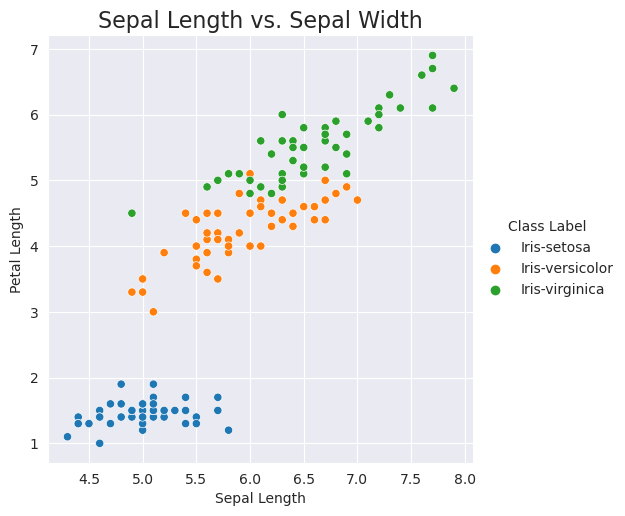

In [75]:
sns.relplot(data = iris, x="Sepal Length", y="Petal Length", hue="Class Label", kind="scatter")
plt.title("Sepal Length vs. Sepal Width", fontsize=16)
plt.show()

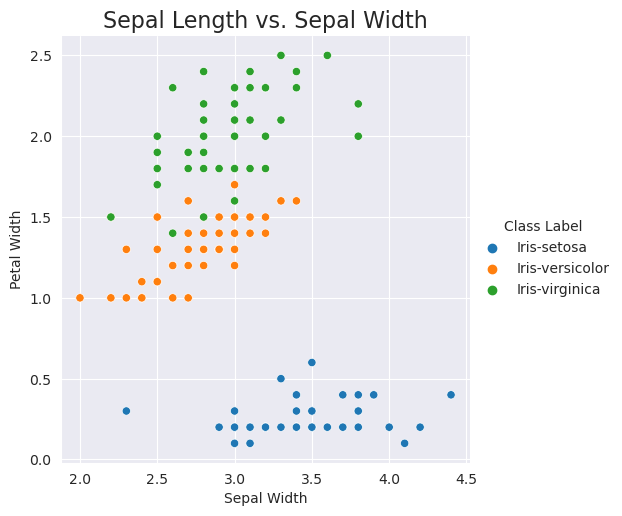

In [76]:
sns.relplot(data = iris, x="Sepal Width", y="Petal Width", hue="Class Label", kind="scatter")
plt.title("Sepal Length vs. Sepal Width", fontsize=16)
plt.show()

From all these scatterplots, we can observe that the setosa class is showing very drastic change in properties.

In [ ]:
# Pair Plot between all students
sns.pairplot(iris, hue = "Class Label")
plt.show()

In [ ]:
# Finding correlation between all variables
corr = iris.corr()
fig, ax = plt.subplots(figsize =(5,4))
sns.heatmap(corr, annot = True, ax = ax)
plt.show()

From this heatmap, there is a strong positive relationship between sepal length and the petal dimensions whereas strong negative relationship between sepal width and the petal dimensions.

### Label Encoder

Changing the categorical value into integer.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Changing the class label into integer values (0,1,2)
iris['Class Label'] = le.fit_transform(iris['Class Label'])
iris.head()

In [ ]:
iris['Class Label'].unique()

### Seperating Data to features and output

In [ ]:
# Seperating Input and output data (X and y)
data = iris.values
X = data[:, 0:4]
y = data[:, 4]

### Train Test Split

In [ ]:
# Splitting the data in train and test state
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state=42 , shuffle = True)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train = y_train.astype(int)
y_train.shape

In [ ]:
y_test = y_test.astype(int)
y_test.shape

### Scaling the data

In [ ]:
# Scaling the data between some limits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_test

### Metrics

In [ ]:
# Importing error and accutacy metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Model Training

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state= 0)
logreg_model.fit(X_train, y_train)

ypred_logreg = logreg_model.predict(X_test)
ypred_logreg

In [ ]:
print(classification_report(y_test, ypred_logreg))
# Classification Report

In [ ]:
accuracy_score(y_test, ypred_logreg)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

ypred_rf = rf_model.predict(X_test)
ypred_rf

In [ ]:
print(classification_report(y_test, ypred_rf))

In [ ]:
accuracy_score(y_test, ypred_rf)

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

ypred_dtree = dtree_model.predict(X_test)

In [ ]:
print(classification_report(y_test, ypred_dtree))

In [ ]:
accuracy_score(y_test, ypred_dtree)

In [ ]:
confusion_matrix(y_test, ypred_dtree)

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

ypred_svc = svc_model.predict(X_test)

In [ ]:
print(classification_report(y_test, ypred_svc))

In [ ]:
accuracy_score(y_test, ypred_svc)

In [ ]:
confusion_matrix(y_test, ypred_svc)

### K - Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

ypred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, ypred_knn)

In [ ]:
print(classification_report(y_test, ypred_knn))

In [ ]:
confusion_matrix(y_test, ypred_knn)

In [ ]:
# Accuracy from different Models
print("Accuracy of Logistic Regression Model:",accuracy_score(y_test, ypred_logreg)*100)
print("Accuracy of Random Forest Classification Model:",accuracy_score(y_test,ypred_rf)*100)
print("Accuracy of Decision Tree Model:",accuracy_score(y_test, ypred_dtree)*100)
print("Accuracy of SVM Model:",accuracy_score(y_test,ypred_svc)*100)
print("Accuracy of KNN Model:",accuracy_score(y_test,ypred_knn)*100)

### A random data?

In [ ]:
x_sample = [[4.5,3.1,2.3,3.4]]

In [ ]:
# Using Random Forest Model to predict a random input data
y_predicted = rf_model.predict(x_sample)
y_predicted # Versicolor

In this way, we successfully trained a Iris Flower Classification ML Project using many Classification Models.